QUESTION 1

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

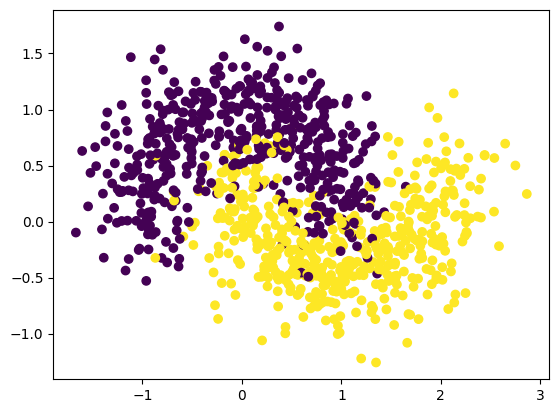

In [34]:
from sklearn.datasets import make_moons
X_data, y_data = make_moons(n_samples = 1000,random_state = 42,noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
plt.scatter(X_data[:,0], X_data[:,1],c=y_data)

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
def find_best_md(x_train, y_train,X_test,y_test,maxdepth):
    best_accuracy = 0
    mdindex = 0
    # Vary the maximum depth of the tree and the minimum samples per split
    for i in range(1, maxdepth):
        # Create the decision tree model
        tree1 = DTC(max_depth=i)
        # Fit the model to the training data
        tree1.fit(x_train, y_train)
        y_pred = tree1.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        # if val_error is smaller than min_error than update
        if accuracy>best_accuracy:
            best_accuracy = accuracy
            mdindex = i
    return mdindex
best_max_depth = find_best_md(X_train,y_train,X_test,y_test,10)
best_tree = DTC(max_depth=best_max_depth)
best_tree.fit(X_train,y_train)
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(best_max_depth)
print(accuracy)


8
0.9233333333333333


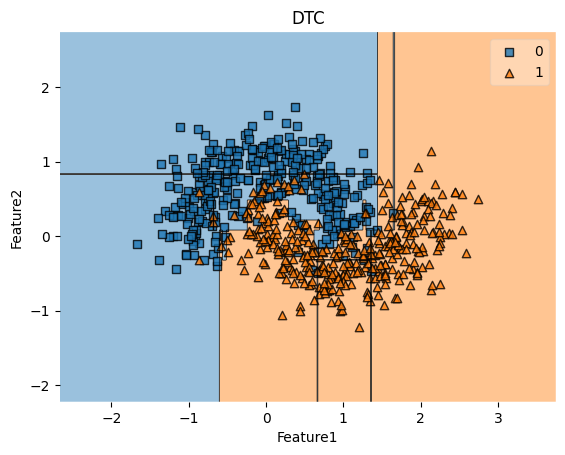

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=best_tree)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('DTC')
plt.show()

0.9166666666666666


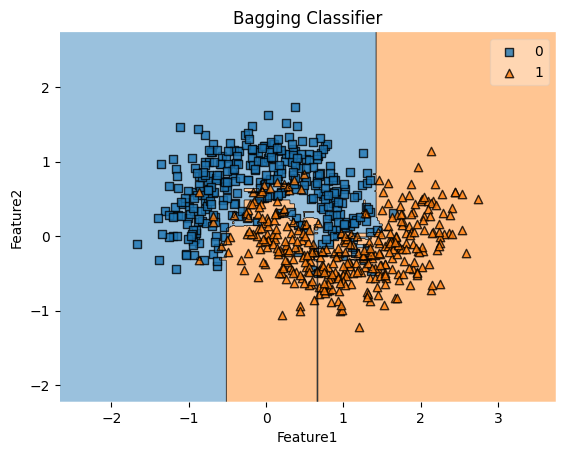

In [65]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
plot_decision_regions(X_train,y_train,clf=bag_clf)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Bagging Classifier')
plt.show()


0.9166666666666666


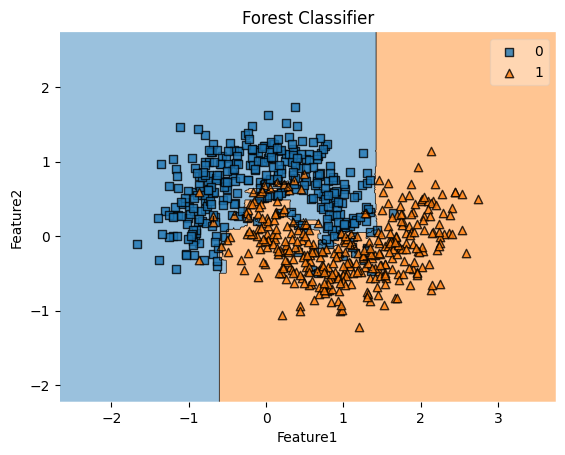

In [66]:
from sklearn.ensemble import RandomForestClassifier
Forest_clf = RandomForestClassifier()
Forest_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
plot_decision_regions(X_train,y_train,clf=Forest_clf)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Forest Classifier')
plt.show()


Almost all of the classifiers have the same accuracy score, but the best classifier is the decision decision tree classifier with the best max depth. Because it goes until the dataset's maximum depth.

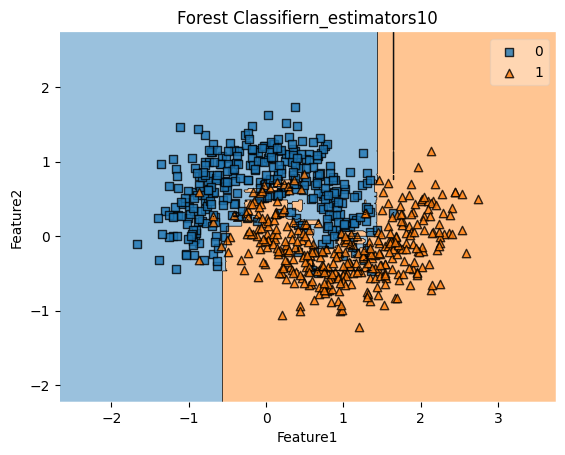

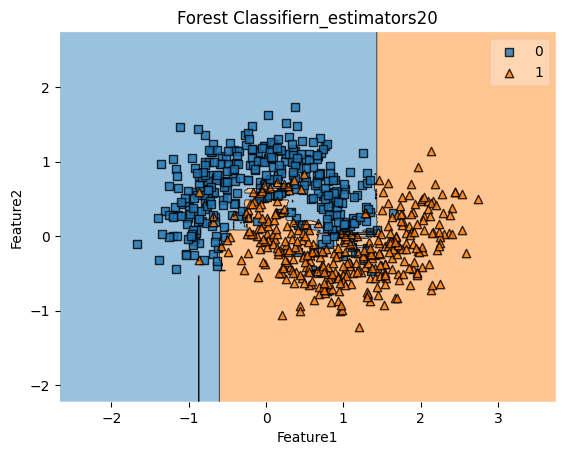

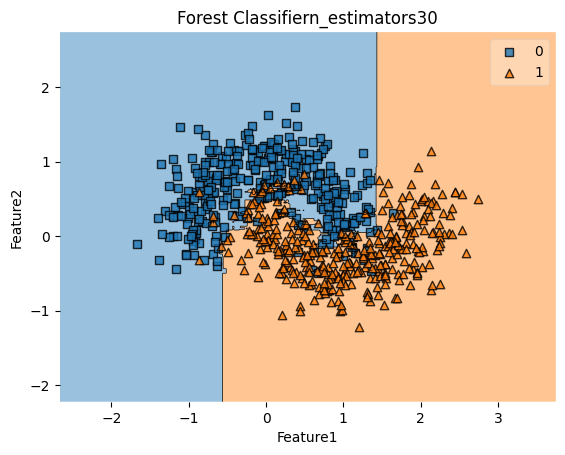

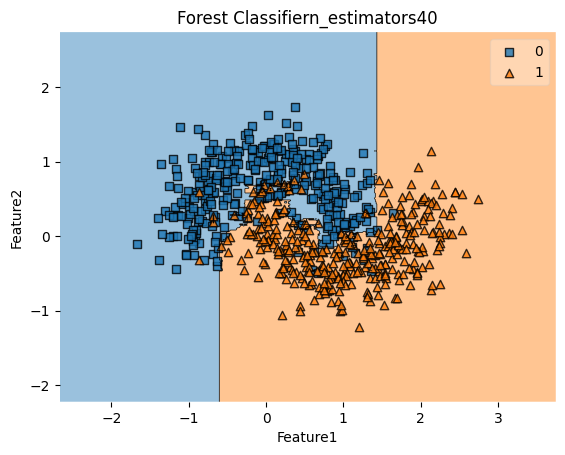

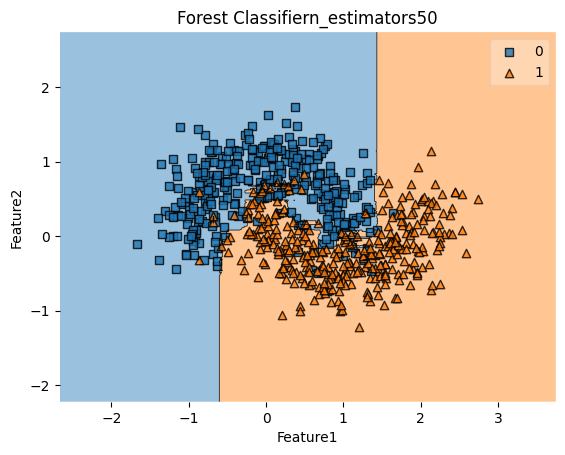

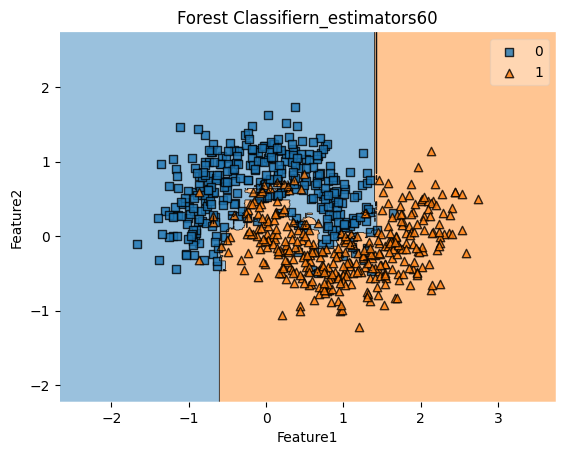

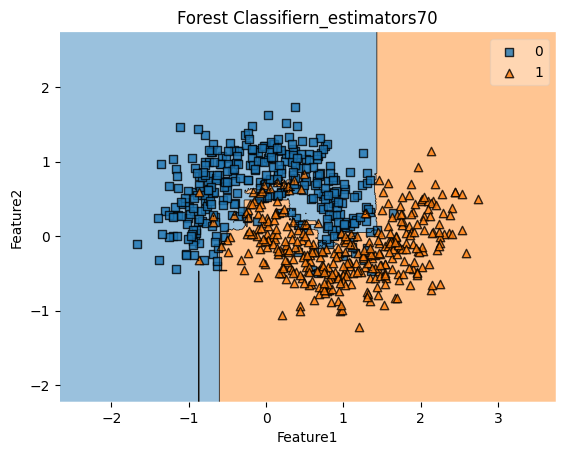

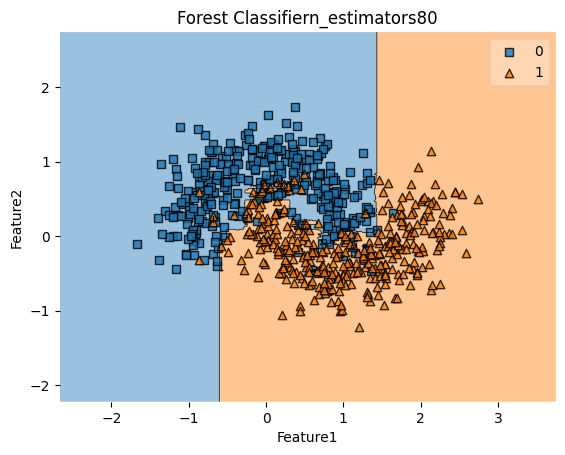

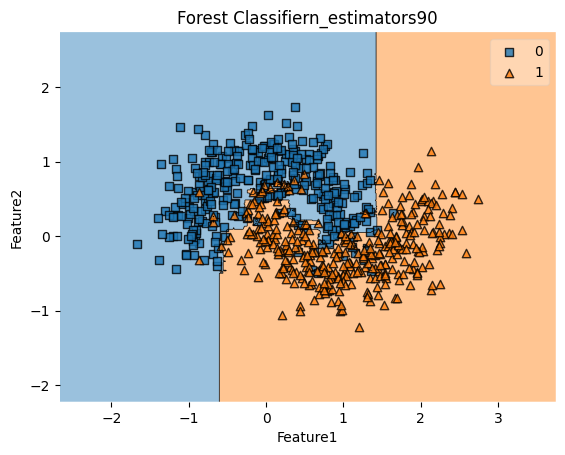

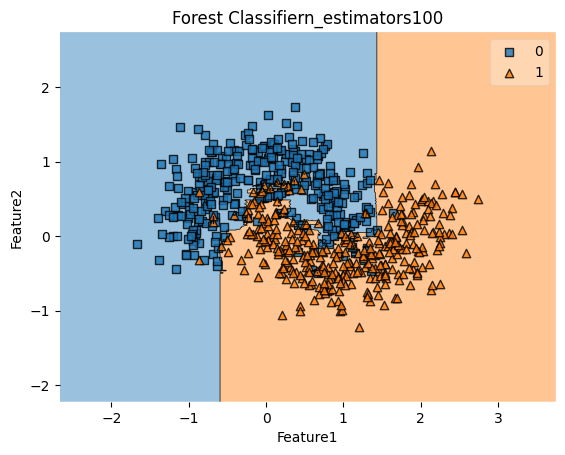

In [39]:
arr = [1,2,3,4,5,6,7,8,9,10]
accuracy_list1 = []
for i in arr:
    Forest_clf = RandomForestClassifier(n_estimators = 10*i)
    Forest_clf.fit(X_train, y_train)
    y_pred = bag_clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_list1.append(accuracy)
    plot_decision_regions(X_train,y_train,clf=Forest_clf)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Forest Classifier'+'n_estimators'+str(10*i))
    plt.show()

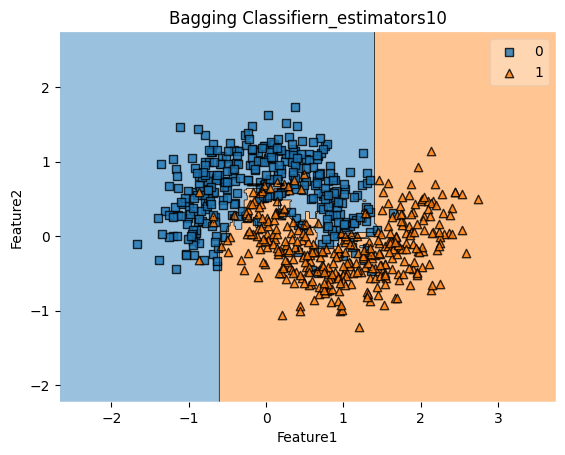

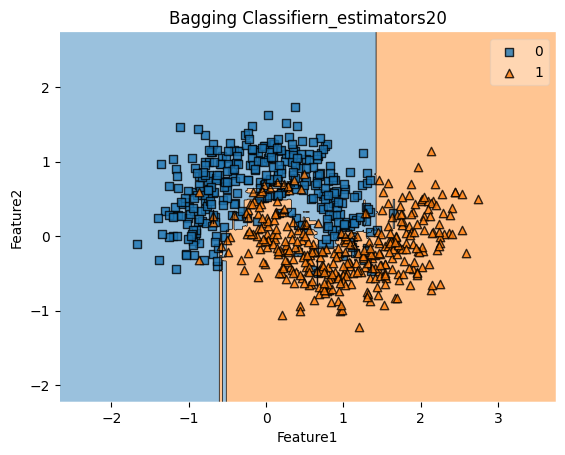

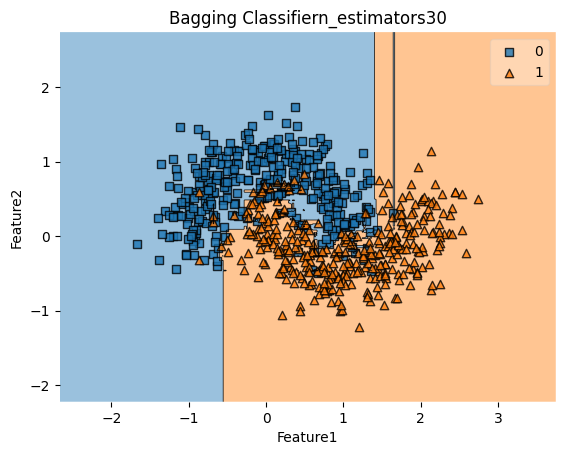

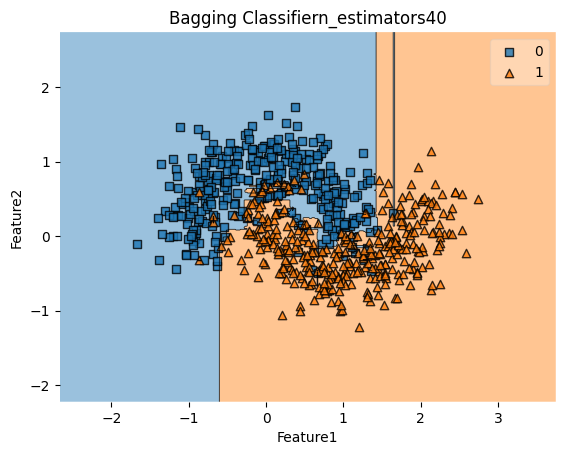

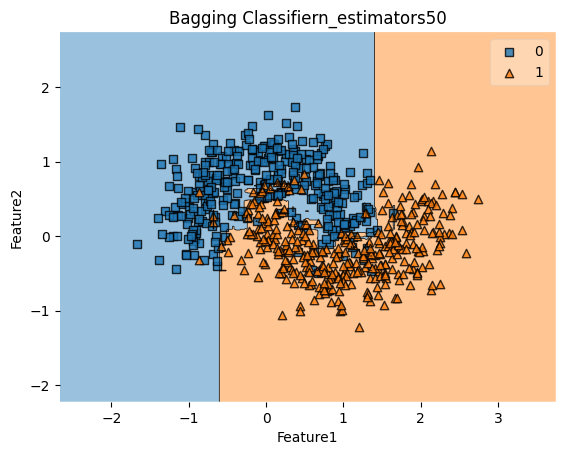

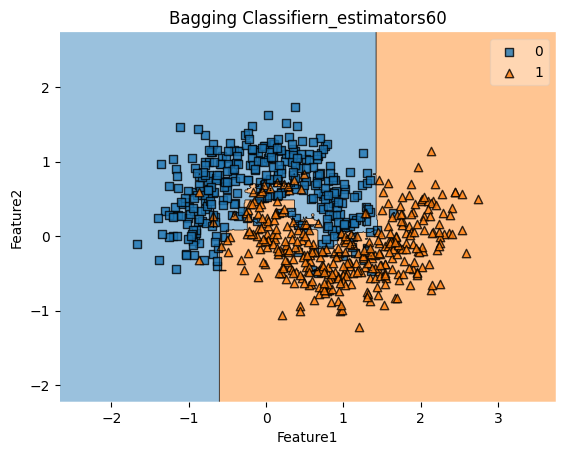

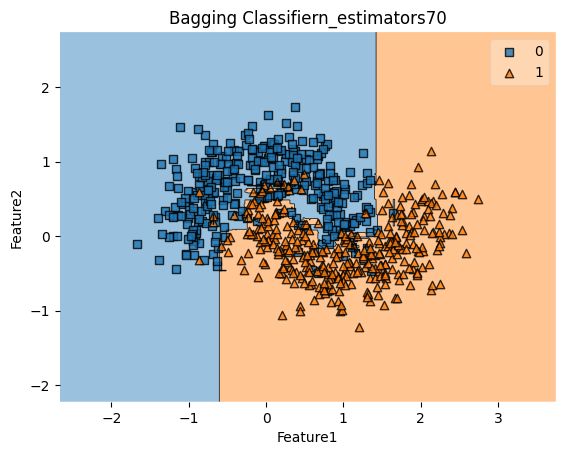

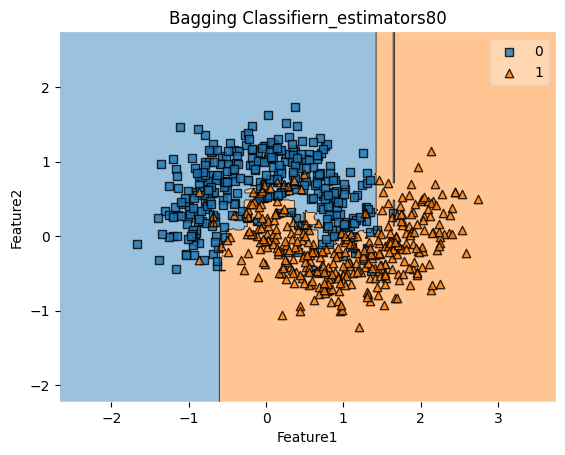

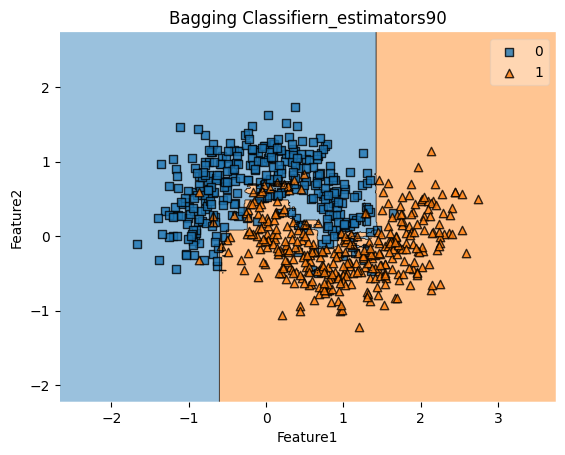

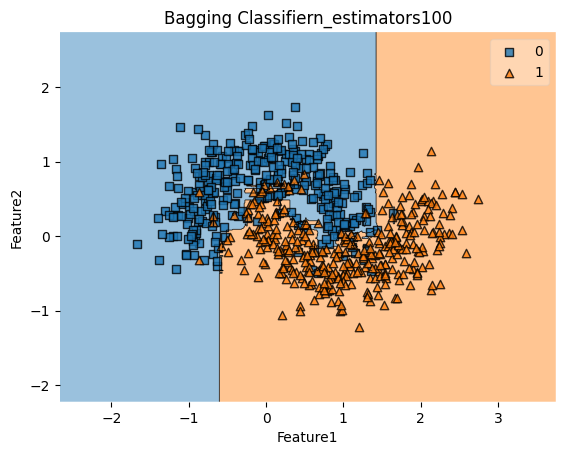

In [40]:
arr = [1,2,3,4,5,6,7,8,9,10]
accuracy_list2 = []
for i in arr:
    bag_clf = BaggingClassifier(n_estimators=10*i)
    bag_clf.fit(X_train, y_train)
    y_pred = bag_clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_list2.append(accuracy)
    plot_decision_regions(X_train,y_train,clf=bag_clf)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Bagging Classifier'+'n_estimators'+str(10*i))
    plt.show()

    

In [41]:
print("RandomForestClassifiers acuuracy")
print(accuracy_list1)
print('BaggingClassifier acuuracy')
print(accuracy_list2)


RandomForestClassifiers acuuracy
[0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333, 0.9233333333333333]
BaggingClassifier acuuracy
[0.9166666666666666, 0.9333333333333333, 0.92, 0.9266666666666666, 0.9266666666666666, 0.92, 0.9233333333333333, 0.9333333333333333, 0.9233333333333333, 0.9266666666666666]


In Bagging Classifier, as the number of estimators goes up, the decision boundary moves closer to the Decision Tree with the best maximum depth value. This is because the Bagging Classifier takes an average of the predictions of the Decision Trees with the best max depth value. As the number of estimators goes up, the decision boundary moves closer to the Decision Tree with the best max depth value.

Random Forest Classifier moves the decision boundary closer to the Decision Tree with the best max depth value as the number of estimators goes up. This is because the Random Forest Classifier takes an average of the predictions of the Decision Trees with the best max depth value. As the number of estimators goes up, the decision boundary moves closer to the Decision Tree with the best max depth value.

Also, the accuracy scores of the Bagging Classifier and the Random Forest Classifier are almost the same.

BAGGING FROM SCRATCH IMPLEMETATION

In [42]:
class BagClassifirer:
    #initializing the number of estimators
    def __init__(self,n_esitimators):
        self.n_esitimators = n_esitimators
        self.estimators = []
    #fitting the data
    def fit(self,X,y):
        rows = np.shape(X)[0]
        for i in range(self.n_esitimators):
            index = np.random.choice(rows,rows,replace=True)
            X_train = X[index]
            y_train = y[index]
            tree = DTC()
            tree.fit(X_train,y_train)
            self.estimators.append(tree)
    #predicting the data
    def predict_bag(self,X):
        y_pred = np.zeros((np.shape(X)[0]))
        for tree in self.estimators:
            y_pred += tree.predict(X)
        y_pred = np.where(y_pred>5,1,0)
        return y_pred

#performance of bagging classifier on the same dataset
bag_clf = BagClassifirer(10)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict_bag(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy of bag_clf is:",accuracy)
print(y_pred)           

accuracy of bag_clf is: 0.9166666666666666
[1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1
 0 1 0 0]


Performance of all the individuals of the classifiers

In [43]:
#accuracies all the estimators are here
acuuracy_list = []
for i in range(10):
    y_pred = bag_clf.estimators[i].predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acuuracy_list.append(accuracy)
print("Accuracies of all estimators are:",acuuracy_list)


Accuracies of all estimators are: [0.8866666666666667, 0.85, 0.9033333333333333, 0.9, 0.86, 0.8966666666666666, 0.89, 0.8733333333333333, 0.8933333333333333, 0.8966666666666666]


VISUALIZATION OF ALL THE ESTIMATORS' PREFORMANCE

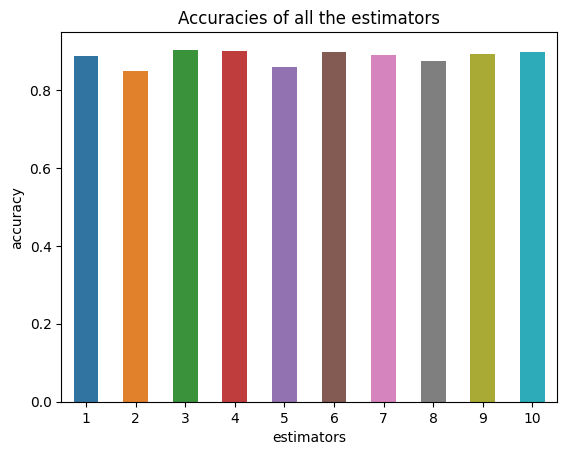

In [44]:
#plot of bar graph of the accuracies of all the estimators
import seaborn as sns
sns.barplot(y=acuuracy_list,x=[1,2,3,4,5,6,7,8,9,10],width=0.5)
plt.xlabel('estimators')
plt.ylabel('accuracy')
plt.title('Accuracies of all the estimators')
plt.show()

QUESTION 2

In [45]:
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
!pip install lightgbm

Training Ada Boost Classifier

In [46]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy adaboost on test set')
print(accuracy)

accuracy adaboost on test set
0.9233333333333333


Training XGBoost Classifier

In [47]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(subsample=0.5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy xgboost on test set')
print(accuracy)

accuracy xgboost on test set
0.9133333333333333


In [48]:
#accuracy on training set of adaboost
y_pred_ada = ada_model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_ada)
print('accuracy adaboost on training set')
print(accuracy)

accuracy adaboost on training set
0.9485714285714286


In [49]:
#accuracy on training set of xgb
y_pred_xgb = xgb_model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_xgb)
print('accuracy xgb on training set')
print(accuracy)

accuracy xgb on training set
0.9857142857142858


Training LGBM Classifier for different number of leaves

In [50]:
from lightgbm import LGBMClassifier
def train_num_leaves(n):
    lgbm_model = LGBMClassifier(num_leaves=n)
    lgbm_model.fit(X_train, y_train)
    y_pred = lgbm_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('accuracy lgbm with'+str(n)+'leaves')
    print(accuracy)
for i in range(2,10):
    train_num_leaves(i)

accuracy lgbm with2leaves
0.9066666666666666
accuracy lgbm with3leaves
0.91
accuracy lgbm with4leaves
0.9166666666666666
accuracy lgbm with5leaves
0.9233333333333333
accuracy lgbm with6leaves
0.92
accuracy lgbm with7leaves
0.9233333333333333
accuracy lgbm with8leaves
0.9133333333333333
accuracy lgbm with9leaves
0.92


To check for the value from where it starts overfitting the data we have to calculate accuracy for both training and test datasets.

In [51]:
#tuning max_depth
def train_max_depth(n,list_train,list_test):
    lgbm_model = LGBMClassifier(max_depth=n)
    lgbm_model.fit(X_train, y_train)
    y_pred_train = lgbm_model.predict(X_train)
    y_pred_test = lgbm_model.predict(X_test)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    list_train.append(accuracy_train)
    list_test.append(accuracy_test)
    return
#tuning num_leaves
def train_num_leaves(n,list_train,list_test):
    lgbm_model = LGBMClassifier(num_leaves=n)
    lgbm_model.fit(X_train, y_train)
    y_pred_train = lgbm_model.predict(X_train)
    y_pred_test = lgbm_model.predict(X_test)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    list_train.append(accuracy_train)
    list_test.append(accuracy_test)
    return

# generally the num_leaves should be smaller than 2^(max_depth) so we wiil take range of max_depth from 2 to 10 and num_leaves from 2 to 25
list_train_max_depth = []
list_test_max_depth = []
list_train_num_leaves = []
list_test_num_leaves = []
for i in range(2,10):
    train_max_depth(i,list_train_max_depth,list_test_max_depth)
for i in range(2,25):
    train_num_leaves(i,list_train_num_leaves,list_test_num_leaves)
print(list_train_max_depth)
print(list_test_max_depth)
print(list_train_num_leaves)
print(list_test_num_leaves)


[0.9328571428571428, 0.9442857142857143, 0.9571428571428572, 0.97, 0.9814285714285714, 0.9871428571428571, 0.9928571428571429, 0.9928571428571429]
[0.91, 0.9166666666666666, 0.9233333333333333, 0.9233333333333333, 0.9133333333333333, 0.9166666666666666, 0.91, 0.9066666666666666]
[0.92, 0.9328571428571428, 0.9385714285714286, 0.9428571428571428, 0.95, 0.9528571428571428, 0.9614285714285714, 0.9657142857142857, 0.97, 0.9785714285714285, 0.9871428571428571, 0.9871428571428571, 0.9914285714285714, 0.9914285714285714, 0.9942857142857143, 0.9957142857142857, 0.9942857142857143, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9066666666666666, 0.91, 0.9166666666666666, 0.9233333333333333, 0.92, 0.9233333333333333, 0.9133333333333333, 0.92, 0.92, 0.92, 0.9233333333333333, 0.91, 0.9133333333333333, 0.9133333333333333, 0.9066666666666666, 0.91, 0.9066666666666666, 0.9066666666666666, 0.91, 0.9033333333333333, 0.9066666666666666, 0.9066666666666666, 0.9133333333333333]


PLot of Accuracy vs Max_depth

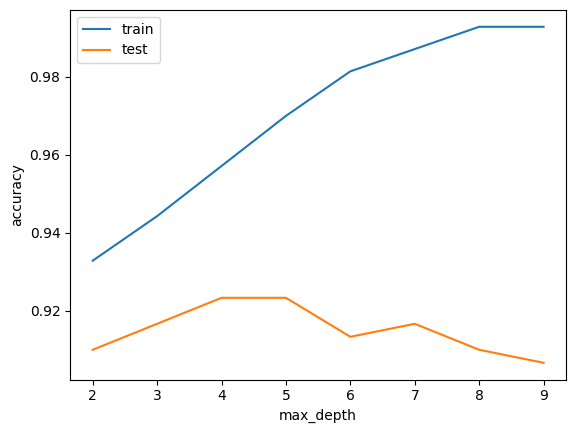

In [52]:
#plotting the accuracy of training and test set with respect to max_depth
plt.plot(range(2,10),list_train_max_depth,label='train')
plt.plot(range(2,10),list_test_max_depth,label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

PLot of accuracy vs num_leaves

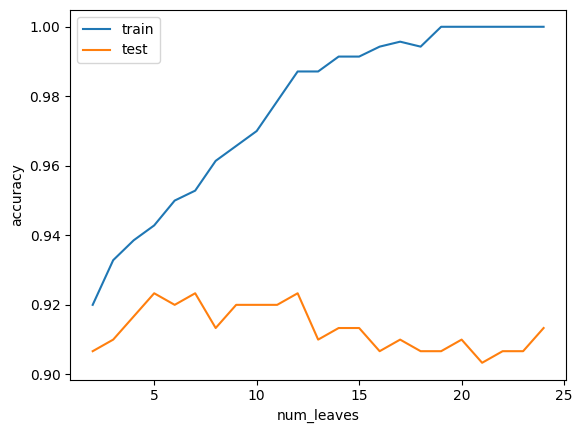

In [53]:
#plotting the accuracy of training and test set with respect to num_leaves
plt.plot(range(2,25),list_train_num_leaves,label='train')
plt.plot(range(2,25),list_test_num_leaves,label='test')
plt.xlabel('num_leaves')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [54]:
#tunning it with according to for all combinations of max_depth and num_leaves
def train_max_depth_num_leaves(max_depth,num_leaves,list_train,list_test):
    lgbm_model = LGBMClassifier(max_depth=max_depth,num_leaves=num_leaves)
    lgbm_model.fit(X_train, y_train)
    y_pred_train = lgbm_model.predict(X_train)
    y_pred_test = lgbm_model.predict(X_test)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    list_train.append(accuracy_train)
    list_test.append(accuracy_test)
    return 
list_train_max_depth_num_leaves = []
list_test_max_depth_num_leaves = []
for i in range(2,10):
    for j in range(2,25):
        train_max_depth_num_leaves(i,j,list_train_max_depth_num_leaves,list_test_max_depth_num_leaves)
# print(list_train_max_depth_num_leaves)
# print(list_test_max_depth_num_leaves)


Here is the visualization of the accuracies and max_depth and num_leaves together in a 3d curve

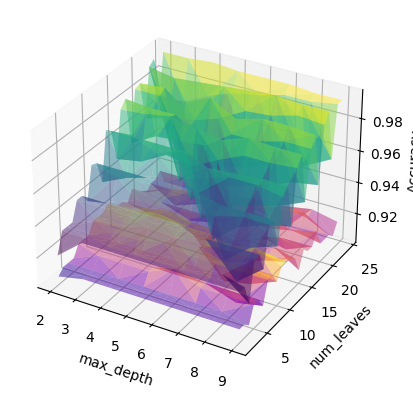

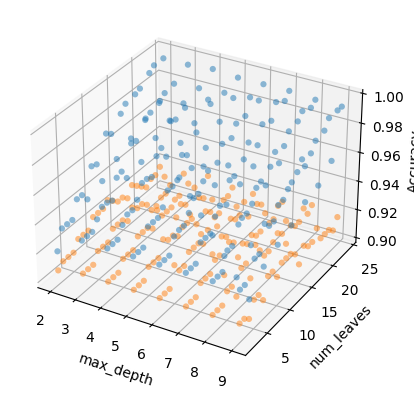

In [55]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(2, 10)
Y = np.arange(2, 25)
X, Y = np.meshgrid(X, Y)
Z_train = np.array(list_train_max_depth_num_leaves).reshape(X.shape)
Z_test = np.array(list_test_max_depth_num_leaves).reshape(X.shape)

#3d continuous plot 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(X.ravel(), Y.ravel(), Z_train.ravel(), alpha=0.5, cmap='viridis', edgecolor='none', label='Train')
ax.plot_trisurf(X.ravel(), Y.ravel(), Z_test.ravel(), alpha=0.5, cmap='plasma', edgecolor='none', label='Test')
ax.set_xlabel('max_depth')
ax.set_ylabel('num_leaves')
ax.set_zlabel('Accuracy')
plt.show()

#3d scatter points plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X.ravel(), Y.ravel(), Z_train.ravel(), alpha=0.5, edgecolor='none', label='Train')
ax.scatter(X.ravel(), Y.ravel(), Z_test.ravel(), alpha=0.5, edgecolor='none', label='Test')
ax.set_xlabel('max_depth')
ax.set_ylabel('num_leaves')
ax.set_zlabel('Accuracy')
plt.show()

From above we can see that as we increase the max_depth num_leaves tends to increase which can be seen in the above graphs.

From above two graphs we can clearly see that in max_depth it increases accuracy for test datsets upto max_depth 4 after that it starts to overfitting the data and in case of num_leaves it increases the accuracy of the test datset upto num_leaves 5 after that it starts to overfitting the data
So as a conculsion we can say that best max_depth = 4 and best num_leaves = 5

In [56]:
# training the model with max_depth=4 and num_leaves=5
lgbm_model_best = LGBMClassifier(max_depth=4,num_leaves=5)
lgbm_model_best.fit(X_train, y_train)
y_pred_train = lgbm_model_best.predict(X_train)
y_pred_test = lgbm_model_best.predict(X_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
print('accuracy on training set')
print(accuracy_train)
print('accuracy on test set')
print(accuracy_test)


accuracy on training set
0.9428571428571428
accuracy on test set
0.9233333333333333


Plotting Decision Boundaries for all the three models

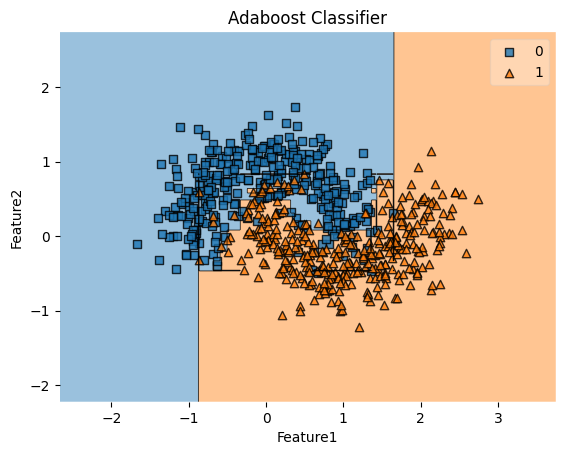

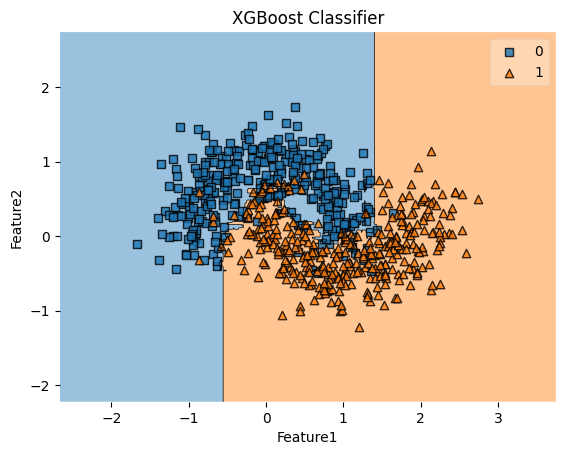

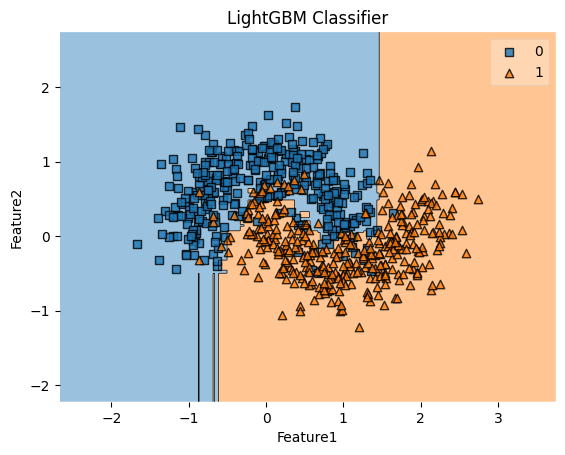

In [57]:
#plotting the decision boundaries for all the three models
plot_decision_regions(X_train,y_train,clf=ada_model)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Adaboost Classifier')
plt.show()

plot_decision_regions(X_train,y_train,clf=xgb_model)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('XGBoost Classifier')
plt.show()

plot_decision_regions(X_train,y_train,clf=lgbm_model_best)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('LightGBM Classifier')
plt.show()


QUESTION 3

<AxesSubplot: ylabel='Count'>

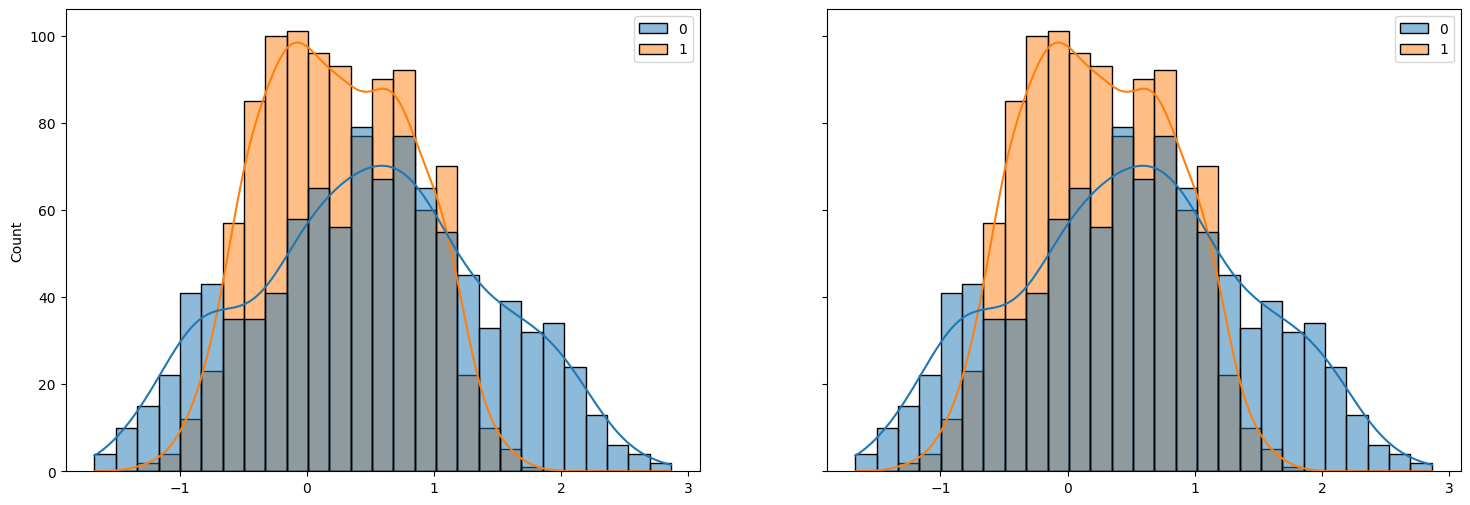

In [58]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(X_data, ax=axes[0], kde=True, color='r')
sns.histplot(X_data, ax=axes[1], kde=True, color='b')

Here we can see that the distribution is gaussian so as the features are continuos we can use Gaussian classifier

In [59]:
#training the dataset with gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)
y_pred_train = model_gnb.predict(X_train)
y_pred_test = model_gnb.predict(X_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
print('accuracy on training set')
print(accuracy_train)
print('accuracy on test set')
print(accuracy_test)

accuracy on training set
0.85
accuracy on test set
0.8533333333333334


Training Voting Classifier

In [60]:
#training voting classifier using above four mdoels of adaboost, xgboost, lightgbm and gaussian naive bayes
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('ada',ada_model),('xgb',xgb_model),('lgbm',lgbm_model_best),('gnb',model_gnb)],voting='hard')
voting_model.fit(X_train,y_train)
y_pred_train = voting_model.predict(X_train)
y_pred_test = voting_model.predict(X_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
print('accuracy on training set')
print(accuracy_train)
print('accuracy on test set')
print(accuracy_test)

accuracy on training set
0.95
accuracy on test set
0.9166666666666666


The comparison between the voting classifier and the all the other models is that the accuracy of the AdaBoost model , XGBoost model,LGBM model and voting classifier is almost the same there is no such big difference between them on the testing dataset while the Gaussian model performs very low in comparison to all the other models. Coming on the training set part XGBoost model overfitts the training dataset that's why it's accuracy on training dataset is very high. However voting classifier does not have gauusain model's effect that much on it because it is following the majority rule so its's accuracy is close to all the other models.
